In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import torch, torchvision
import torchvision.models as models

import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# models.alexnet(pretrained=False)
models.alexnet(pretrained=True)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Image load and normalize

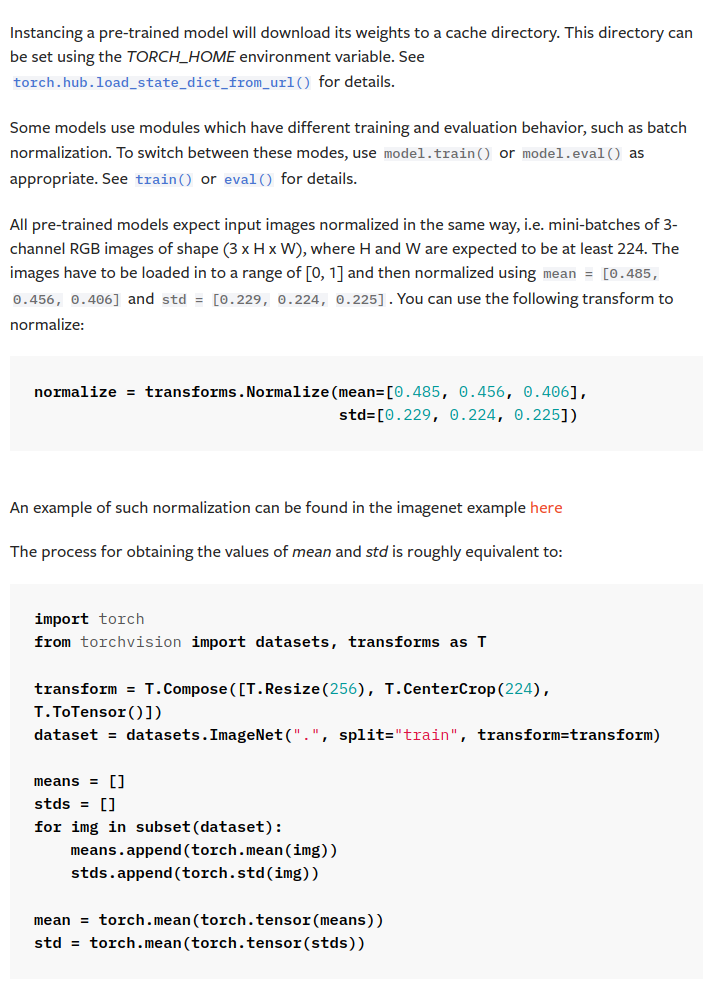

In [6]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = "/content/drive/MyDrive/data/alexnet_fig1.png"

# 이미지 표시
Image(filename=image_path)


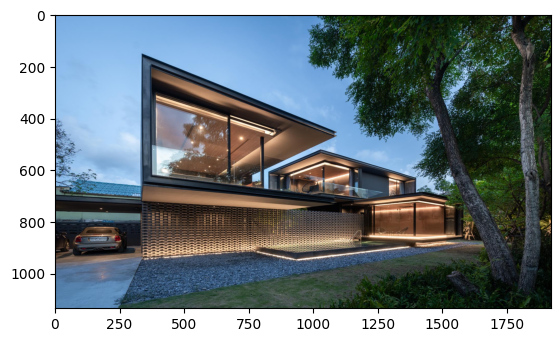

torch.Size([1, 3, 1135, 1920])


In [ ]:
image = '/content/drive/MyDrive/computer_vision_kit/02_컴퓨터비전_특화_이론과_실습/Ch_03.딥러닝과_컴퓨터비전/data/house.jpg'
image = Image.open(image).convert('RGB')    # rgb가 input image여서 convert 안해줘도 되긴 함
plt.imshow(image)
plt.show()


## convert pytorch tensor and normalize image
to_tensor = torchvision.transforms.ToTensor()
normalizer = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

image = normalizer(to_tensor(image))

image = image.unsqueeze(0) ## batchify ## [B, C, H, W] -> 파이토치의 기본 구조임

print(image.shape)


## Load pre-trained weights on ImageNet classification task

https://arxiv.org/abs/1404.5997


In [ ]:
alexnet = models.alexnet(pretrained=True)

alexnet.eval() ## freeze weights.

alexnet.train() ## trainable weights.

alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Forward

In [ ]:

print("input shape: ", image.shape)

logit = alexnet(image)

print("output shape",logit.shape, logit)

print(torch.argmax(logit))  # 10,000개의 class에 대한 확률값들이 나오고, 이 중 가장 큰 값을 알려줌

input shape:  torch.Size([1, 3, 1135, 1920])
output shape torch.Size([1, 1000]) tensor([[-4.0906e-01, -2.1492e+00, -5.2687e-01, -1.8397e+00, -2.2916e+00,
         -1.7763e+00, -1.1393e+00, -1.0794e+00, -5.8275e-01,  1.3364e+00,
         -8.5825e-01, -8.9750e-01,  2.4921e-01,  5.0546e-01, -1.4565e-01,
          3.4445e-01, -8.2493e-01, -2.0274e-02,  1.0436e+00,  8.4747e-01,
         -1.0789e+00, -3.1191e-01, -2.6967e-01,  6.2171e-01,  5.3072e-01,
         -1.6987e+00, -1.7245e+00, -1.6496e+00, -2.4873e+00, -8.8655e-01,
         -1.5785e+00, -2.0345e+00, -2.4973e+00, -2.6933e+00, -6.8693e-01,
         -1.8858e+00, -2.7297e-01, -1.7963e+00, -1.8495e+00, -9.0451e-01,
         -4.8569e-01, -1.6526e+00, -1.1613e+00, -6.7847e-01, -3.6174e-01,
         -1.4196e+00, -1.7365e-01, -1.6728e+00, -9.9393e-01, -6.9773e-01,
         -7.0991e-01, -6.4483e-01, -1.1095e+00, -1.5021e+00, -6.6458e-02,
         -9.8430e-01, -1.7753e+00, -1.3565e+00, -7.7693e-01, -5.9587e-01,
         -5.9950e-01, -1.2736e+0

## Load existing dataset

https://pytorch.org/vision/0.12/datasets.html

In [ ]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True)

100%|██████████| 170498071/170498071 [00:05<00:00, 32905385.89it/s]


Extracting ./cifar-10-python.tar.gz to ./


In [ ]:
len(cifar10)

50000

(32, 32) 6


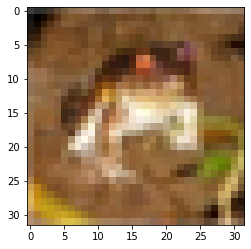

torch.Size([1, 3, 32, 32])


In [ ]:

for img, gt in cifar10:

    print(img.size, gt)

    plt.imshow(img)
    plt.show()


    ### TODO: transforms the image to pytorch tensor and forward into the alexnet model.


    img = normalizer(to_tensor(img))
    img = img.unsqueeze(0)

    print(img.shape)



    break


